# <center> **Vietnamese Traditional Music Classification (Deep Learning Approach)**</center>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Define root directory
root = '/content/drive/MyDrive/DATA/VNTM3'
folder_root = "/content/drive/MyDrive/DATA/mel-images"
dataset_root = "/content/drive/MyDrive/DATA/dataset"
train_root = "/content/drive/MyDrive/DATA/train"
val_root = "/content/drive/MyDrive/DATA/val"
test_root = "/content/drive/MyDrive/DATA/test"
checkpoint_filepath = '/content/drive/MyDrive/DATA/checkpoint'
saved_model_path = '/content/drive/MyDrive/DATA/model'
test_audio_path = "/content/drive/MyDrive/DATA/test_audio"

In [3]:
import os
import librosa as lb
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import random

In [4]:
os.listdir(root)

['hatxam', 'chauvan', 'cheo', 'cailuong', 'catru']

In [5]:
# Define variables for further use
type_list = {0: ["cailuong", "CaiLuong"], 1: ["catru", "Catru"], 2:["chauvan", "Chauvan"], 3: ["cheo", "Cheo"], 4: ["hatxam", "Xam"]}
class_list = {0: "cailuong", 1: "catru", 2:"chauvan", 3: "cheo", 4: "hatxam"}

## 2) **Split train/val/test**

Split all mel-spectrogram images into train/val/test folder, each folder has images of 5 class

In [6]:
TRAIN_RATE = 0.75
VAL_RATE = 0.15
TEST_RATE = 0.1

In [7]:
from sklearn.model_selection import train_test_split
import shutil

In [8]:
def train_val_test_split(folder_root, dataset_root, type_index):
    """
    Split and save train/val/test set
    Input:
    - folder_root: folder_root containing mel-spec images
    - dataset_root: Directory to save dataset
    - type_root : train_root, val_root or test_root
    - type_index: class index in type_list
    """

    def save_set(subset, dataset_root, typeset, type_index):
      """
      Save X_train, X_val, X_test to their respective dir
      Input:
        - subset - X_train, X_val, X_test
        - dataset_root: Directory to save dataset
        - typeset - train, val, test
        - type index - Class index
      """
      # Copy file from subset to train/val/test folder
      for file in subset:
          srcpath = os.path.join(src_dir, file)
          #print(srcpath)
          dst_dir = dataset_root + "/" + typeset + "/{}".format(type_list[type_index][0])
          #print(dst_dir)
          if not os.path.exists(dst_dir):
              os.makedirs(dst_dir)
          shutil.copy(srcpath, dst_dir)


    src_dir = folder_root + "/{}".format(type_list[type_index][0])
    X = os.listdir(src_dir)
    print(X)
    Y = ["{}".format(type_list[type_index][0]) for i in range(0, len(X))]
    # Train 75%, test 25%
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 1 - TRAIN_RATE, random_state=42, shuffle = True)
    # Val 15 %, test 10%
    X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size = TEST_RATE / (TEST_RATE + VAL_RATE), random_state=42, shuffle = True)

    # Create dataset_root to save dataset
    if not os.path.exists(dataset_root):
        os.makedirs(dataset_root)
    # Save train/val/test of each class
    save_set(X_train, dataset_root, "train", type_index)
    save_set(X_val, dataset_root, "val", type_index)
    save_set(X_test, dataset_root, "test", type_index)


In [ ]:
# Train/val/test_split for class "cailuong"
train_val_test_split(folder_root, dataset_root, 0)

['CaiLuong.000.png', 'CaiLuong.001.png', 'CaiLuong.002.png', 'CaiLuong.003.png', 'CaiLuong.004.png', 'CaiLuong.005.png', 'CaiLuong.006.png', 'CaiLuong.007.png', 'CaiLuong.008.png', 'CaiLuong.009.png', 'CaiLuong.010.png', 'CaiLuong.011.png', 'CaiLuong.012.png', 'CaiLuong.013.png', 'CaiLuong.014.png', 'CaiLuong.015.png', 'CaiLuong.016.png', 'CaiLuong.017.png', 'CaiLuong.018.png', 'CaiLuong.019.png', 'CaiLuong.020.png', 'CaiLuong.021.png', 'CaiLuong.022.png', 'CaiLuong.023.png', 'CaiLuong.024.png', 'CaiLuong.025.png', 'CaiLuong.026.png', 'CaiLuong.027.png', 'CaiLuong.028.png', 'CaiLuong.029.png', 'CaiLuong.030.png', 'CaiLuong.031.png', 'CaiLuong.032.png', 'CaiLuong.033.png', 'CaiLuong.034.png', 'CaiLuong.035.png', 'CaiLuong.036.png', 'CaiLuong.037.png', 'CaiLuong.038.png', 'CaiLuong.039.png', 'CaiLuong.040.png', 'CaiLuong.041.png', 'CaiLuong.042.png', 'CaiLuong.043.png', 'CaiLuong.044.png', 'CaiLuong.045.png', 'CaiLuong.046.png', 'CaiLuong.047.png', 'CaiLuong.048.png', 'CaiLuong.049.png',

In [ ]:
# Train/val/test_split for class "catru"
train_val_test_split(folder_root, dataset_root, 1)

['Catru.000.png', 'Catru.001.png', 'Catru.002.png', 'Catru.003.png', 'Catru.004.png', 'Catru.005.png', 'Catru.006.png', 'Catru.007.png', 'Catru.008.png', 'Catru.009.png', 'Catru.010.png', 'Catru.011.png', 'Catru.012.png', 'Catru.013.png', 'Catru.014.png', 'Catru.015.png', 'Catru.016.png', 'Catru.017.png', 'Catru.018.png', 'Catru.019.png', 'Catru.020.png', 'Catru.021.png', 'Catru.022.png', 'Catru.023.png', 'Catru.024.png', 'Catru.025.png', 'Catru.026.png', 'Catru.027.png', 'Catru.028.png', 'Catru.029.png', 'Catru.030.png', 'Catru.031.png', 'Catru.032.png', 'Catru.033.png', 'Catru.034.png', 'Catru.035.png', 'Catru.036.png', 'Catru.037.png', 'Catru.038.png', 'Catru.039.png', 'Catru.040.png', 'Catru.041.png', 'Catru.042.png', 'Catru.043.png', 'Catru.044.png', 'Catru.045.png', 'Catru.046.png', 'Catru.047.png', 'Catru.048.png', 'Catru.049.png', 'Catru.050.png', 'Catru.051.png', 'Catru.052.png', 'Catru.053.png', 'Catru.054.png', 'Catru.055.png', 'Catru.056.png', 'Catru.057.png', 'Catru.058.pn

In [ ]:
# Train/val/test_split for class "chauvan"
train_val_test_split(folder_root, dataset_root, 2)

['Chauvan.000.png', 'Chauvan.001.png', 'Chauvan.002.png', 'Chauvan.003.png', 'Chauvan.004.png', 'Chauvan.005.png', 'Chauvan.006.png', 'Chauvan.007.png', 'Chauvan.008.png', 'Chauvan.009.png', 'Chauvan.010.png', 'Chauvan.011.png', 'Chauvan.012.png', 'Chauvan.013.png', 'Chauvan.014.png', 'Chauvan.015.png', 'Chauvan.016.png', 'Chauvan.017.png', 'Chauvan.018.png', 'Chauvan.019.png', 'Chauvan.020.png', 'Chauvan.021.png', 'Chauvan.022.png', 'Chauvan.023.png', 'Chauvan.024.png', 'Chauvan.025.png', 'Chauvan.026.png', 'Chauvan.027.png', 'Chauvan.028.png', 'Chauvan.029.png', 'Chauvan.030.png', 'Chauvan.031.png', 'Chauvan.032.png', 'Chauvan.033.png', 'Chauvan.034.png', 'Chauvan.035.png', 'Chauvan.036.png', 'Chauvan.037.png', 'Chauvan.038.png', 'Chauvan.039.png', 'Chauvan.040.png', 'Chauvan.041.png', 'Chauvan.042.png', 'Chauvan.043.png', 'Chauvan.044.png', 'Chauvan.045.png', 'Chauvan.046.png', 'Chauvan.047.png', 'Chauvan.048.png', 'Chauvan.049.png', 'Chauvan.050.png', 'Chauvan.051.png', 'Chauvan.05

In [ ]:
# Train/val/test_split for class "cheo"
train_val_test_split(folder_root, dataset_root, 3)

['Cheo.000.png', 'Cheo.001.png', 'Cheo.002.png', 'Cheo.003.png', 'Cheo.004.png', 'Cheo.005.png', 'Cheo.006.png', 'Cheo.007.png', 'Cheo.008.png', 'Cheo.009.png', 'Cheo.010.png', 'Cheo.011.png', 'Cheo.012.png', 'Cheo.013.png', 'Cheo.014.png', 'Cheo.015.png', 'Cheo.016.png', 'Cheo.017.png', 'Cheo.018.png', 'Cheo.019.png', 'Cheo.020.png', 'Cheo.021.png', 'Cheo.022.png', 'Cheo.023.png', 'Cheo.024.png', 'Cheo.025.png', 'Cheo.026.png', 'Cheo.027.png', 'Cheo.028.png', 'Cheo.029.png', 'Cheo.030.png', 'Cheo.031.png', 'Cheo.032.png', 'Cheo.033.png', 'Cheo.034.png', 'Cheo.035.png', 'Cheo.036.png', 'Cheo.037.png', 'Cheo.038.png', 'Cheo.039.png', 'Cheo.040.png', 'Cheo.041.png', 'Cheo.042.png', 'Cheo.043.png', 'Cheo.044.png', 'Cheo.045.png', 'Cheo.046.png', 'Cheo.047.png', 'Cheo.048.png', 'Cheo.049.png', 'Cheo.050.png', 'Cheo.051.png', 'Cheo.052.png', 'Cheo.053.png', 'Cheo.054.png', 'Cheo.055.png', 'Cheo.056.png', 'Cheo.057.png', 'Cheo.058.png', 'Cheo.059.png', 'Cheo.060.png', 'Cheo.061.png', 'Cheo.0

In [ ]:
# Train/val/test_split for class "hatxam"
train_val_test_split(folder_root, dataset_root, 4)

['Xam.000.png', 'Xam.001.png', 'Xam.002.png', 'Xam.003.png', 'Xam.004.png', 'Xam.005.png', 'Xam.006.png', 'Xam.007.png', 'Xam.008.png', 'Xam.009.png', 'Xam.010.png', 'Xam.011.png', 'Xam.012.png', 'Xam.013.png', 'Xam.014.png', 'Xam.015.png', 'Xam.016.png', 'Xam.017.png', 'Xam.018.png', 'Xam.019.png', 'Xam.020.png', 'Xam.021.png', 'Xam.022.png', 'Xam.023.png', 'Xam.024.png', 'Xam.025.png', 'Xam.026.png', 'Xam.027.png', 'Xam.028.png', 'Xam.029.png', 'Xam.030.png', 'Xam.031.png', 'Xam.032.png', 'Xam.033.png', 'Xam.034.png', 'Xam.036.png', 'Xam.037.png', 'Xam.038.png', 'Xam.039.png', 'Xam.040.png', 'Xam.041.png', 'Xam.042.png', 'Xam.043.png', 'Xam.044.png', 'Xam.045.png', 'Xam.046.png', 'Xam.047.png', 'Xam.048.png', 'Xam.049.png', 'Xam.050.png', 'Xam.051.png', 'Xam.052.png', 'Xam.053.png', 'Xam.054.png', 'Xam.055.png', 'Xam.056.png', 'Xam.057.png', 'Xam.058.png', 'Xam.059.png', 'Xam.060.png', 'Xam.061.png', 'Xam.062.png', 'Xam.063.png', 'Xam.064.png', 'Xam.065.png', 'Xam.066.png', 'Xam.067.

## 3) **Build model for Mel-spectrogram Image Classification**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [10]:
data_dir = "/content/drive/MyDrive/DATA/mel-images"

In [11]:
# Redefine train/val/test set directory after train/val/test split
train_dir = dataset_root + "/" + train_root.split("/")[-1]
val_dir = dataset_root + "/" + val_root.split("/")[-1]
test_dir = dataset_root + "/" + test_root.split("/")[-1]
print(train_dir)
print(val_dir)
print(test_dir)

/content/drive/MyDrive/DATA/dataset/train
/content/drive/MyDrive/DATA/dataset/val
/content/drive/MyDrive/DATA/dataset/test


In [18]:
n_class = 5
input_shape = (128, 1292)
tf.random.set_seed(42)

In [19]:
# Create dataset without data augmentation
non_train_datagen = ImageDataGenerator(rescale = 1./255)
non_val_datagen = ImageDataGenerator(rescale=1./255)
non_test_datagen = ImageDataGenerator(rescale=1./255)
non_train_generator = non_train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 1292),
    shuffle = True,
    subset='training'
)
non_val_generator = non_val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 1292),
)
non_test_generator = non_test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,1292),
)

Found 1875 images belonging to 5 classes.
Found 375 images belonging to 5 classes.
Found 250 images belonging to 5 classes.


In [20]:
# Define callbacks
early = EarlyStopping(monitor='loss',
    patience= 5,
    verbose= 1,
    mode='auto',
    baseline= None,
    restore_best_weights= True)


In [21]:
# Plot result: Loss and accuracy
def plot_result(history):
    fig, ag = plt.subplots(1,2,figsize = (15,6))
    ag[0].plot(history.history['loss'],label = 'train')
    ag[0].plot(history.history['val_loss'],label = 'test')
    ag[0].legend()
    ag[0].set_title('Loss versus epochs')

    ag[1].plot(history.history['accuracy'],label='train')
    ag[1].plot(history.history['val_accuracy'],label='test')
    ag[1].legend()
    ag[1].set_title('Accuracy versus epochs')
    plt.show()

### Helper function for model evaluation

In [41]:
test_file_names = non_test_generator.filenames # All file in test set
class_indices = non_test_generator.class_indices  # Class index dic
test_labels = non_test_generator.labels

In [42]:
test_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
test_file_names

In [22]:
def predict(file_names, labels, class_list, typeset, model):
    y_pred_index = []
    y_class_pred = []
    for file in file_names:
        file_root = dataset_root + "/" + typeset + "/" + str(file)
        image = load_img(file_root, target_size=(input_shape[0], input_shape[1], 3))
        image_array = img_to_array(image)
        image_array = image_array * 1./255
        input_data = tf.expand_dims(image_array, 0)
        pred = model.predict(input_data, verbose = 0)
        pred_index = np.argmax(np.squeeze(pred))
        y_pred_index.append(pred_index)
        y_class_pred.append(class_list[pred_index])
    print("---Predicted----")
    print("Accuracy on {} set : {}".format(typeset, (labels == y_pred_index).sum()/ len(labels)))
    return y_pred_index, y_class_pred

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [24]:
def get_cfm(y_pred, labels, class_list, typeset):
    ax= plt.subplot()
    cfm = confusion_matrix(y_pred, labels)
    sns.heatmap(cfm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    # labels, title and ticks
    ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
    ax.set_title('Confusion Matrix on {} set'.format(typeset), fontsize = 20);
    ax.xaxis.set_ticklabels(list(class_list.values()))
    ax.yaxis.set_ticklabels(list(class_list.values()))
    plt.show()

## Model1

Model 1 architecture

In [25]:
from PIL import Image

# creating a object
im = Image.open(r"/content/drive/MyDrive/DATA/model_images/model1.png")
im.show()

In [26]:
def model1(input_shape = input_shape, n_class = n_class):
    model = tf.keras.models.Sequential([
        #first_convolution
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(input_shape[0], input_shape[1], 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        #second_convolution
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #third_convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #fourth_convolution
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(n_class, activation='softmax')
    ])
    if not os.path.exists(checkpoint_filepath + '/model1'):
        os.makedirs(checkpoint_filepath + '/model1')
    checkpoint1= tf.keras.callbacks.ModelCheckpoint(
    filepath= checkpoint_filepath + '/model1' + '/model1_{epoch:02d}_{val_accuracy:.4f}.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
    )
    return model, checkpoint1
non_model1, checkpoint1 = model1(input_shape, n_class)
non_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
non_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 1290, 16)     448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 645, 16)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 643, 32)       4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 321, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 319, 64)       18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 159, 64)       0

In [27]:
if not os.path.exists(dataset_root + "/checkpoint"):
    os.makedirs(dataset_root + "/checkpoint")
if not os.path.exists(checkpoint_filepath):
    os.makedirs(checkpoint_filepath)
if not os.path.exists(checkpoint_filepath + '/model1'):
    os.makedirs(checkpoint_filepath + '/model1')

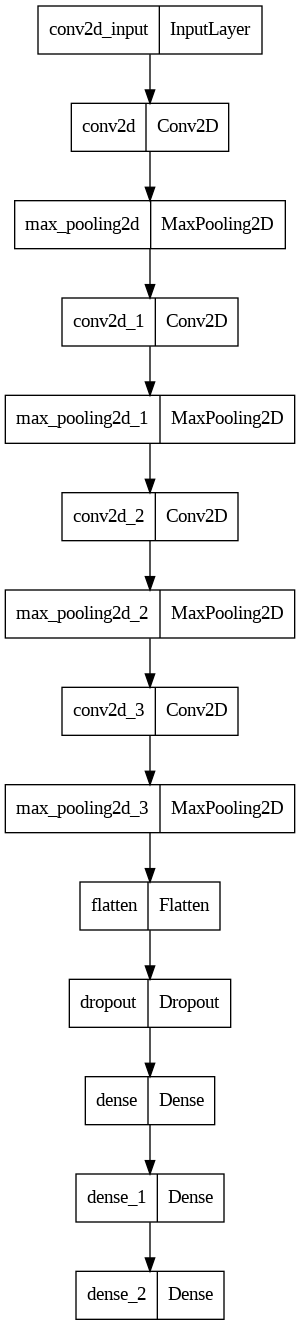

In [ ]:
plot_model(non_model1)

In [ ]:
if tf.test.gpu_device_name():
  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
else:
  print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [28]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Fit with non-augmented data
non_model1_history = non_model1.fit(non_train_generator, batch_size= 32, epochs = 15, callbacks=[early, checkpoint1],
                   validation_data = non_val_generator, validation_batch_size = 32)

Epoch 1/15
59/59 [==============================] - ETA: 0s - loss: 1.4201 - accuracy: 0.3605
Epoch 1: val_accuracy improved from -inf to 0.56267, saving model to /content/drive/MyDrive/DATA/checkpoint/model1/model1_01_0.5627.h5
59/59 [==============================] - 42s 567ms/step - loss: 1.4201 - accuracy: 0.3605 - val_loss: 1.0774 - val_accuracy: 0.5627
Epoch 2/15
59/59 [==============================] - ETA: 0s - loss: 0.9100 - accuracy: 0.6427
Epoch 2: val_accuracy improved from 0.56267 to 0.70400, saving model to /content/drive/MyDrive/DATA/checkpoint/model1/model1_02_0.7040.h5
59/59 [==============================] - 27s 466ms/step - loss: 0.9100 - accuracy: 0.6427 - val_loss: 0.8354 - val_accuracy: 0.7040
Epoch 3/15
59/59 [==============================] - ETA: 0s - loss: 0.6081 - accuracy: 0.7616
Epoch 3: val_accuracy improved from 0.70400 to 0.74667, saving model to /content/drive/MyDrive/DATA/checkpoint/model1/model1_03_0.7467.h5
59/59 [==============================] - 28

### Evaluate best model1

In [29]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [30]:
best_model1, _ = model1(input_shape = input_shape, n_class = n_class)
checkpoint_model1_path = checkpoint_filepath + "/model1"
best_model1_path =  checkpoint_model1_path + "/" + str(os.listdir(checkpoint_model1_path)[-1])
best_model1.load_weights(best_model1_path)
best_model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy", tf.keras.metrics.Precision(),  tf.keras.metrics.Recall()])


In [ ]:
loss_val1, acc_val1, pre_val1, recall_val1 = best_model1.evaluate(non_val_generator)

12/12 [==============================] - 5s 277ms/step - loss: 1.0369 - accuracy: 0.8320 - precision: 0.8365 - recall: 0.8320


In [ ]:
loss1, acc1, precision1, recall1 = best_model1.evaluate(non_test_generator)

8/8 [==============================] - 4s 471ms/step - loss: 0.4954 - accuracy: 0.8880 - precision: 0.8871 - recall: 0.8800


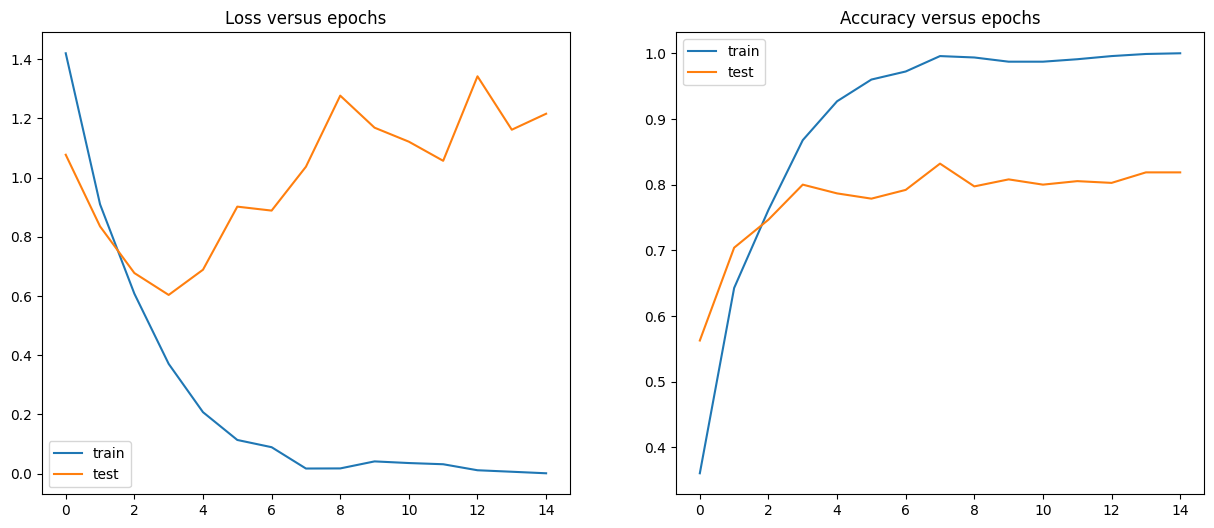

In [ ]:
# Plot result
plot_result(non_model1_history)

In [ ]:
best_model1.save(saved_model_path + '/best_model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y1_pred, y1_class = predict(test_file_names, test_labels, class_list, "test", best_model1)

---Predicted----
Accuracy on test set : 0.888


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Cai Luong', 'Ca tru', 'Chau Van', 'Cheo', 'Hat Xam']
print(classification_report(y1_pred, test_labels, target_names=target_names))

              precision    recall  f1-score   support

   Cai Luong       0.96      0.91      0.93        53
      Ca tru       0.94      0.87      0.90        54
    Chau Van       0.86      1.00      0.92        43
        Cheo       0.90      0.83      0.87        54
     Hat Xam       0.78      0.85      0.81        46

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



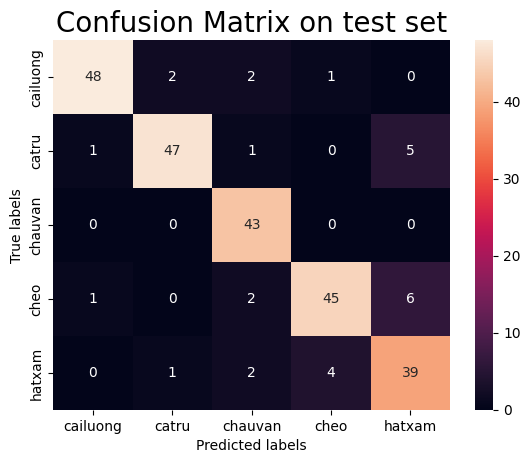

In [ ]:
get_cfm(y1_pred, test_labels, class_list, "test")

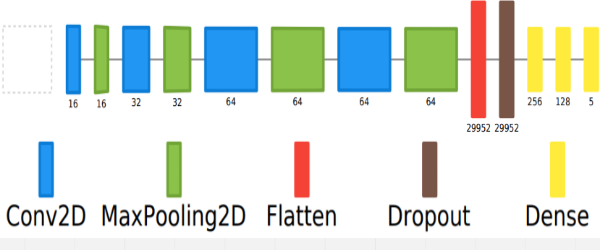

In [31]:
import io
from PIL import Image

byteImgIO = io.BytesIO()
byteImg = Image.open("/content/drive/MyDrive/DATA/model_images/model1.png")
byteImg.save(byteImgIO, "PNG")
byteImgIO.seek(0)
byteImg = byteImgIO.read()

# Non test code
dataBytesIO = io.BytesIO(byteImg)
Image.open(dataBytesIO)

## Model 2

Model2 architecture:

In [32]:
im2 = Image.open(r"/content/drive/MyDrive/DATA/model_images/model2.png")
im2.show()

In [33]:
# Define model2
def model2(input_shape = input_shape, n_class = n_class):
    model2= tf.keras.Sequential(layers=[
            tf.keras.layers.InputLayer(input_shape= (input_shape[0], input_shape[1], 3)),
            tf.keras.layers.Conv2D(32, (5, 5), padding='same', activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation="relu"),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(n_class, activation="softmax")
        ])
    if not os.path.exists(checkpoint_filepath + '/model2'):
        os.makedirs(checkpoint_filepath + '/model2')
    checkpoint2= tf.keras.callbacks.ModelCheckpoint(
    filepath= checkpoint_filepath + '/model2' + '/model2_{epoch:02d}_{val_accuracy:.4f}.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
    )
    return model2, checkpoint2
non_model2, checkpoint2 = model2(input_shape, n_class)
non_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
non_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 1292, 32)     2432      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 64, 646, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 646, 32)       9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 32, 323, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 323, 64)       18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 16, 161, 64)      

In [ ]:
non_model2_history = non_model2.fit(non_train_generator, batch_size=32, epochs= 15, callbacks=[early, checkpoint2], shuffle=True,
                   validation_data = non_val_generator, validation_batch_size = 32)

Epoch 1/15
59/59 [==============================] - ETA: 0s - loss: 1.7267 - accuracy: 0.3120
Epoch 1: val_accuracy improved from -inf to 0.46933, saving model to /content/drive/MyDrive/DATA/checkpoint/model2/model2_01_0.4693.h5
59/59 [==============================] - 33s 490ms/step - loss: 1.7267 - accuracy: 0.3120 - val_loss: 1.2528 - val_accuracy: 0.4693
Epoch 2/15
59/59 [==============================] - ETA: 0s - loss: 1.1460 - accuracy: 0.5397
Epoch 2: val_accuracy improved from 0.46933 to 0.56267, saving model to /content/drive/MyDrive/DATA/checkpoint/model2/model2_02_0.5627.h5
59/59 [==============================] - 27s 459ms/step - loss: 1.1460 - accuracy: 0.5397 - val_loss: 1.1722 - val_accuracy: 0.5627
Epoch 3/15
59/59 [==============================] - ETA: 0s - loss: 0.8736 - accuracy: 0.6677
Epoch 3: val_accuracy improved from 0.56267 to 0.68800, saving model to /content/drive/MyDrive/DATA/checkpoint/model2/model2_03_0.6880.h5
59/59 [==============================] - 27

### Evaluate best model2

In [34]:
best_model2, _ = model2(input_shape = input_shape, n_class = n_class)
checkpoint_model2_path = checkpoint_filepath + "/model2"
best_model2_path =  checkpoint_model2_path + "/" + str(os.listdir(checkpoint_model2_path)[-1])
best_model2.load_weights(best_model2_path)
best_model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy", tf.keras.metrics.Precision(),  tf.keras.metrics.Recall()], run_eagerly=True)


In [ ]:
checkloss2, acc2, precision2, recall2 = best_model2.evaluate(non_val_generator)

12/12 [==============================] - 7s 380ms/step - loss: 1.2099 - accuracy: 0.7973 - precision_1: 0.7995 - recall_1: 0.7973


In [ ]:
loss2_test, acc2_test, precision2_test, recall2_test = best_model2.evaluate(non_test_generator)

8/8 [==============================] - 5s 640ms/step - loss: 0.6467 - accuracy: 0.8440 - precision_1: 0.8474 - recall_1: 0.8440


In [ ]:
y2_pred, y2_class = predict(test_file_names, test_labels, class_list, "test", best_model2)

---Predicted----
Accuracy on test set : 0.844


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Cai Luong', 'Ca tru', 'Chau Van', 'Cheo', 'Hat Xam']
print(classification_report(y2_pred, test_labels, target_names=target_names))

              precision    recall  f1-score   support

   Cai Luong       0.88      0.94      0.91        47
      Ca tru       0.86      0.86      0.86        50
    Chau Van       0.82      1.00      0.90        41
        Cheo       0.86      0.70      0.77        61
     Hat Xam       0.80      0.78      0.79        51

    accuracy                           0.84       250
   macro avg       0.84      0.86      0.85       250
weighted avg       0.84      0.84      0.84       250



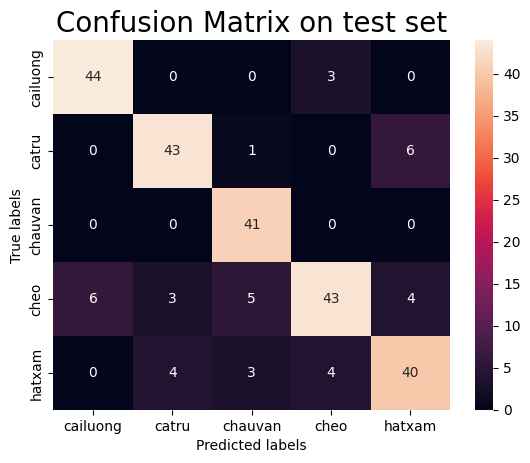

In [ ]:
get_cfm(y2_pred, test_labels, class_list, "test")

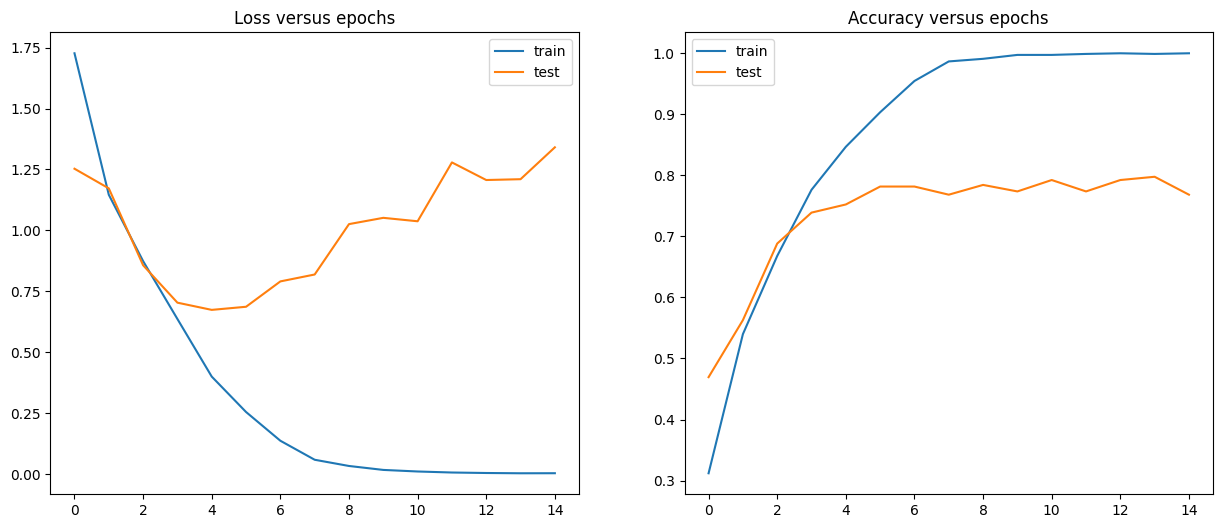

In [ ]:
plot_result(non_model2_history)

In [ ]:
best_model2.save(saved_model_path + '/best_model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Model 3

Model 3 architecture:

In [35]:
im3 = Image.open(r"/content/drive/MyDrive/DATA/model_images/model3.png")
im3.show()

In [36]:
def model3(input_shape = input_shape, n_class = n_class):
      model = tf.keras.models.Sequential([
      #first_convolution
      tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(input_shape[0], input_shape[1], 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      #second_convolution
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      #third_convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      #fourth_convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      #Output layers
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Dense(n_class, activation='softmax')])

      if not os.path.exists(checkpoint_filepath + "/model3"):
          os.makedirs(checkpoint_filepath + "/model3")
      checkpoint3= tf.keras.callbacks.ModelCheckpoint(
      filepath= checkpoint_filepath + '/model3' + '/model3_{epoch:02d}_{val_accuracy:.4f}.h5',
      monitor='val_accuracy',
      save_best_only=True,
      save_weights_only=True,
      verbose=1
      )
      return model, checkpoint3
non_model3, checkpoint3 = model3(input_shape, n_class)
non_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
non_model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 124, 1288, 16)     1216      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 62, 644, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 60, 642, 32)       4640      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 30, 321, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 319, 64)       18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 14, 159, 64)      

In [ ]:
non_model3_history = non_model3.fit(non_train_generator, batch_size=32, epochs= 15, callbacks=[early, checkpoint3], shuffle=True,
                   validation_data = non_val_generator, validation_batch_size = 32)

Epoch 1/15
59/59 [==============================] - ETA: 0s - loss: 1.4412 - accuracy: 0.4539
Epoch 1: val_accuracy improved from -inf to 0.62667, saving model to /content/drive/MyDrive/DATA/checkpoint/model3/model3_01_0.6267.h5
59/59 [==============================] - 40s 564ms/step - loss: 1.4412 - accuracy: 0.4539 - val_loss: 1.2229 - val_accuracy: 0.6267
Epoch 2/15
59/59 [==============================] - ETA: 0s - loss: 0.8216 - accuracy: 0.6773
Epoch 2: val_accuracy improved from 0.62667 to 0.66400, saving model to /content/drive/MyDrive/DATA/checkpoint/model3/model3_02_0.6640.h5
59/59 [==============================] - 30s 508ms/step - loss: 0.8216 - accuracy: 0.6773 - val_loss: 0.9238 - val_accuracy: 0.6640
Epoch 3/15
59/59 [==============================] - ETA: 0s - loss: 0.5507 - accuracy: 0.7963
Epoch 3: val_accuracy improved from 0.66400 to 0.82933, saving model to /content/drive/MyDrive/DATA/checkpoint/model3/model3_03_0.8293.h5
59/59 [==============================] - 27

In [37]:
aug_model3, checkpoint3 = model3(input_shape, n_class)
aug_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
aug_model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 124, 1288, 16)     1216      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 62, 644, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 60, 642, 32)       4640      
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 321, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 319, 64)       18496     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 159, 64)      

### Evaluate best model 3

In [38]:
best_model3, _ = model3(input_shape = input_shape, n_class = n_class)
checkpoint_model3_path = checkpoint_filepath + "/model3"
best_model3_path =  checkpoint_model3_path + "/" + str(os.listdir(checkpoint_model3_path)[-1])
best_model3.load_weights(best_model3_path)
best_model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy", tf.keras.metrics.Precision(),  tf.keras.metrics.Recall()])


In [ ]:
loss3, acc3, pre3, recall3 = best_model3.evaluate(non_val_generator)

12/12 [==============================] - 5s 357ms/step - loss: 0.4047 - accuracy: 0.8640 - precision_2: 0.8963 - recall_2: 0.8293


In [ ]:
loss3_test, acc3_test, pre3_test, recall3_test = best_model3.evaluate(non_test_generator)

8/8 [==============================] - 4s 504ms/step - loss: 0.2680 - accuracy: 0.9080 - precision_2: 0.9454 - recall_2: 0.9000


In [ ]:
y3_pred, y3_class = predict(test_file_names, test_labels, class_list, "test", best_model3)

---Predicted----
Accuracy on test set : 0.908


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Cai Luong', 'Ca tru', 'Chau Van', 'Cheo', 'Hat Xam']
print(classification_report(y3_pred, test_labels, target_names=target_names))

              precision    recall  f1-score   support

   Cai Luong       0.96      1.00      0.98        48
      Ca tru       0.90      0.88      0.89        51
    Chau Van       0.94      0.96      0.95        49
        Cheo       0.86      0.93      0.90        46
     Hat Xam       0.88      0.79      0.83        56

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



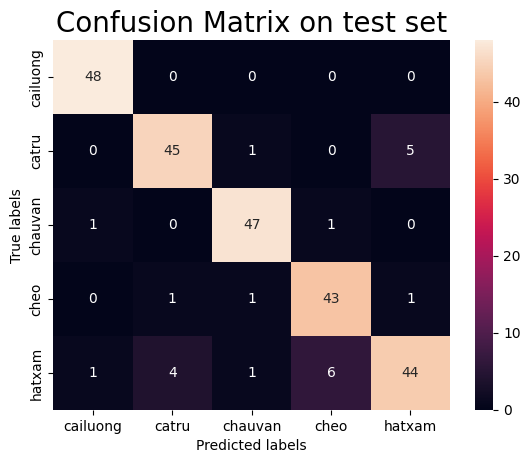

In [ ]:
get_cfm(y3_pred, test_labels, class_list, "test")

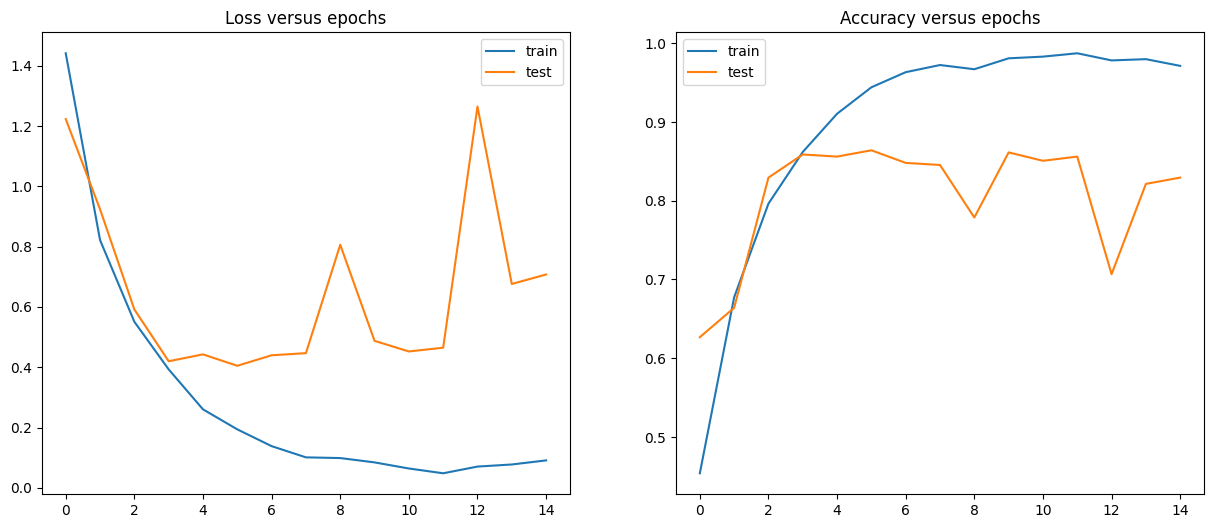

In [ ]:
plot_result(non_model3_history)

In [ ]:
best_model3.save(saved_model_path + '/best_model3_ver2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 5) Predict new audio

In [ ]:
def predict_new30s(audio_dir, model, save_dir = "/content/drive/MyDrive/DATA/test_images"):
    """
    Predict new 30s-length audio
    Input:
    - audio_dir : List of audios directory (.wav)
    - model: model to predict
    - save_dir: "/content/drive/MyDrive/DATA/test_images" - directory save log-mel-spec image of new audio
    """

    y_pred = []
    y_class = []

    for dir in audio_dir:
        load_dir, sr = lb.load(dir)
        S = lb.feature.melspectrogram(y = load_dir, sr=sr)
        S_db = lb.amplitude_to_db(S, ref=np.max)

        if not os.path.exists(save_dir):
            os.makedirs(save_dir)

        audio_file_name = dir.split("/")[-1][:-4]

        saved_img_root = save_dir + "/{}".format(audio_file_name) + ".png"
        plt.imsave(saved_img_root, S_db)

        image = load_img(saved_img_root, target_size=(input_shape[0], input_shape[1], 3))
        image_array = img_to_array(image)
        input_data = tf.expand_dims(image_array, 0)
        pred = model.predict(input_data, verbose = 0)
        pred_index = np.argmax(np.squeeze(pred))
        y_pred.append(pred_index)
        y_class.append(class_list[pred_index])

        return y_pred, y_class, pred


In [ ]:
y_pred, y_class, pred = predict_new30s(["/content/drive/MyDrive/DATA/VNTM3/chauvan/Chauvan.044.wav"], best_model2)

In [39]:
!pip install pydub

In [40]:
from pydub import AudioSegment


In [ ]:
def predict_new(audio_dir, model, save_dir, unit_length = 661500):
    """
    Predict audio of any length
    Split each audio into several equal sample which length = unit_length, then feed to NN
    Get predict class by most votting of each sample's prediction

    Input:
    - audio_dir: List of audio directory to predict
    - model: Model to predict
    - save_dir: Directory to save log-mel-spec image of samples splitted from each audio in audio_dir
    Output:
    - y_pred_index: List of index predicted of each audio in audio_dir
    - y_pred_class: Respective class predicted of y_pred_index
    """
    def mp3_2_wav(dir, dst, sample_rate = 22050):
        """
        Convert mp3 to wav and save wav file to dst
        Input: dir (mp3)
        """
        # convert wav to mp3.
        sound = AudioSegment.from_mp3(dir)
        sound.set_frame_rate(sample_rate)
        sound.export(dst, format="wav")


    def process(samples_split, save_dir, file_name, is_saved):
        """
        End to end processing steps of each audio

        Input:
        - samples_split: List of samples splitted from each audio in audio_dir
        - save_dir: Directory to save log-mel-spec image of samples splitted from each audio in audio_dir
        - is_save: If False, do not save log-mel-spec image of samples, just make prediction

        Output:
        - np.array(samples_db_list): A batch of samples of each audio file (nums_of_sample, input_shape[0], input_shape[1], 3) to feed to NN
        """
        samples_db_list = []
        for i, sample in enumerate(samples_split):
            S = lb.feature.melspectrogram(y = sample, sr=sr)
            S_db = lb.amplitude_to_db(S, ref=np.max)
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            sample_root = save_dir + "/{}".format(file_name) + "_sample{}".format(i) + ".png"
            plt.imsave(sample_root, S_db)
            image = load_img(sample_root, target_size=(input_shape[0], input_shape[1], 3))
            img_array = img_to_array(image)
            img_array = img_array / 255
            samples_db_list.append(img_array)
            if not is_saved: # Not save mode
                for file in os.listdir(save_dir):
                    if file.endswith('.png'):
                        os.remove(save_dir + '/' + file)
        return np.array(samples_db_list)

    # Define result
    y_pred_index = []
    y_pred_class = []

    # List of samples of each audio
    samples_split = []
    y_pred_split = []

    for dir in audio_dir:
        if dir.endswith(".mp3"):
            # Get file name
            wav_dir = test_audio_path + "/" + dir.split("/")[-1][:-4] + ".wav"
            mp3_2_wav(dir, wav_dir)
            dir = wav_dir       # Take wav dir for sampling

        audio, sr = lb.load(dir)
        if (len(audio) >= unit_length):
            # Number of sample of each audio
            nums_of_samples = len(audio) // unit_length
        else:
            err = "Audio length must be greater than 30s"
            print(err)
            return err
        for i in range(0, nums_of_samples):
            curr_sample = audio[i * unit_length : i * unit_length + unit_length]
            if (len(curr_sample) != unit_length): # Cannot sampling this curr_sample
                break
            samples_split.append(audio[i * unit_length : i * unit_length + unit_length])

        file_name = dir.split("/")[-1][:-4]

        input_data = process(samples_split, save_dir, file_name, False)

        pred_candidates = model.predict(input_data, verbose = 0)

        pred_index_candidates = [np.argmax(sample) for sample in pred_candidates]

        pred_index = max(pred_index_candidates, key = pred_index_candidates.count)
        pred_class = class_list[pred_index]

        y_pred_index.append(pred_index)
        y_pred_class.append(pred_class)

        # Reset samples_split after passing one dir of audio_dir
        samples_split = []

    return y_pred_index, y_pred_class



### Let's predict new audio

###"hatxam" label test

In [12]:
hatxam_test = ["/content/drive/MyDrive/DATA/test_audio/XamXoan-VariousArtists-HATXAM.mp3",
               "/content/drive/MyDrive/DATA/test_audio/XamXoanTrongQuan-HaThiCau-HATXAM.mp3",
               "/content/drive/MyDrive/DATA/test_audio/ThuocPhien-HaThiCau-HATXAM.mp3",
               "/content/drive/MyDrive/DATA/test_audio/Hatxam-Nhoinay-HaThiCau-HATXAM.mp3"]


In [ ]:
# model1 predict
best_model1, _ = model1(input_shape = input_shape, n_class = n_class)
predict_new(hatxam_test, best_model1, "/content/drive/MyDrive/DATA/test_images")

([0, 0, 0, 0], ['cailuong', 'cailuong', 'cailuong', 'cailuong'])

In [ ]:
# model2 predict
predict_new(hatxam_test, best_model2, "/content/drive/MyDrive/DATA/test_images")

([4, 4, 0, 4], ['hatxam', 'hatxam', 'cailuong', 'hatxam'])

In [ ]:
# model3 predict
predict_new(hatxam_test, best_model3, "/content/drive/MyDrive/DATA/test_images")

([4, 4, 4, 4], ['hatxam', 'hatxam', 'hatxam', 'hatxam'])

### "cheo" label test

In [13]:
cheo_test = ["/content/drive/MyDrive/DATA/test_audio/TinhThuHaVi-QuocPhong-CHEO.mp3",
             "/content/drive/MyDrive/DATA/test_audio/NonThungQuaiThao-CHEO.mp3",
             "/content/drive/MyDrive/DATA/test_audio/TrinhPhu-DangCapNhat-CHEO.mp3",
             "/content/drive/MyDrive/DATA/test_audio/DuongTruongTiengDan-CHEO.mp3",
             "/content/drive/MyDrive/DATA/test_audio/DaoLieu-VanChuongNSUT-CHEO.mp3"]

In [ ]:
#model1 predict
predict_new(cheo_test, best_model1, "/content/drive/MyDrive/DATA/test_images")

([2, 2, 0, 0, 0], ['chauvan', 'chauvan', 'cailuong', 'cailuong', 'cailuong'])

In [ ]:
#model2 predict
predict_new(cheo_test, best_model2, "/content/drive/MyDrive/DATA/test_images")

([3, 3, 1, 3, 3], ['cheo', 'cheo', 'catru', 'cheo', 'cheo'])

In [ ]:
#model3 predict
predict_new(cheo_test, best_model3, "/content/drive/MyDrive/DATA/test_images")

([3, 3, 4, 4, 3], ['cheo', 'cheo', 'hatxam', 'hatxam', 'cheo'])

###"cailuong" label test

In [14]:
cailuong_test = ["/content/drive/MyDrive/DATA/test_audio/DieuHoQuang-TrangThuDaKhuc-CAILUONG.mp3",
                 "/content/drive/MyDrive/DATA/test_audio/DuyenKiepTanCoGiaoDuyen-MinhVuon_3eu59.mp3",
                 "/content/drive/MyDrive/DATA/test_audio/LenhTruyNa-VuongLinh-CAILUONG.mp3",
                 "/content/drive/MyDrive/DATA/test_audio/Tinhyeuvagiotnuocmat-NguyenKha-CAILUONG.mp3",
                 "/content/drive/MyDrive/DATA/test_audio/Bepluachieulybiet-CAILUONG.mp3"]

In [ ]:
predict_new(cailuong_test, best_model1, "/content/drive/MyDrive/DATA/test_images")

([0, 0, 0, 0, 0], ['cailuong', 'cailuong', 'cailuong', 'cailuong', 'cailuong'])

In [ ]:
predict_new(cailuong_test, best_model2, "/content/drive/MyDrive/DATA/test_images")

([0, 0, 0, 2, 0], ['cailuong', 'cailuong', 'cailuong', 'chauvan', 'cailuong'])

In [ ]:
predict_new(cailuong_test, best_model3, "/content/drive/MyDrive/DATA/test_images")

([3, 0, 0, 2, 0], ['cheo', 'cailuong', 'cailuong', 'chauvan', 'cailuong'])

### "ca tru" label test

In [15]:
catru_test = ["/content/drive/MyDrive/DATA/test_audio/loithenonnuoc_catru.mp3",
              "/content/drive/MyDrive/DATA/test_audio/TuongTienTuu-QuachThiHo-CATRU.wav",
              "/content/drive/MyDrive/DATA/test_audio/HuongSonPhongCanhCa_CaTru.wav",
              "/content/drive/MyDrive/DATA/test_audio/HongHongTuyetTuyet-QuachThiHo-CaTru.mp3",
              "/content/drive/MyDrive/DATA/test_audio/MotNetCaTruNgayXuan-ThanhLoan-CaTru.mp3"]

In [ ]:
predict_new(catru_test, best_model1, "/content/drive/MyDrive/DATA/test_images")

<ipython-input-64-6763f552db53>:71: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = lb.load(dir)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


OSError: ignored

In [ ]:
predict_new(catru_test, best_model2, "/content/drive/MyDrive/DATA/test_images")

In [ ]:
predict_new(catru_test, best_model3, "/content/drive/MyDrive/DATA/test_images")

###"chau van" label test

In [16]:
chauvan_test = ["/content/drive/MyDrive/DATA/test_audio/CoChin-ThanhNgoanKhacTu-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/CauBeDoiNgang-VanChuong-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/ThinhMauVaQuanDeNhat-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/BaChuaThac-ChauVan-ThanhNgoan-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/CoSau-VanChuong-CHAUVAN.mp3"]

In [ ]:
predict_new(chauvan_test, best_model1, "/content/drive/MyDrive/DATA/test_images") # Bad

In [ ]:
predict_new(chauvan_test, best_model2, "/content/drive/MyDrive/DATA/test_images") # Not good

In [ ]:
predict_new(chauvan_test, best_model3, "/content/drive/MyDrive/DATA/test_images") # Quite good

In [17]:
def PROD_predict(audio_dir, save_dir, model1, model2, model3, unit_length = 661500):
    """
    Predict audio of any length using PROD fusion of three models
    Split each audio into several equal sample which length = unit_length, then feed to NN
    Get predict class by most votting of each sample's prediction

    Input:
    - audio_dir: List of audio directory to predict
    - model: Model to predict
    - save_dir: Directory to save log-mel-spec image of samples splitted from each audio in audio_dir
    Output:
    - y_pred_index: List of index predicted of each audio in audio_dir
    - y_pred_class: Respective class predicted of y_pred_index
    """
    def mp3_2_wav(dir, dst, sample_rate = 22050):
        """
        Convert mp3 to wav and save wav file to dst
        Input: dir (mp3)
        """
        # convert mp3 to wav.
        sound = AudioSegment.from_mp3(dir)
        sound.set_frame_rate(sample_rate)
        sound.export(dst, format="wav")


    def process(samples_split, save_dir, file_name, is_saved):
        """
        End to end processing steps of each audio

        Input:
        - samples_split: List of samples splitted from each audio in audio_dir
        - save_dir: Directory to save log-mel-spec image of samples splitted from each audio in audio_dir
        - is_save: If False, do not save log-mel-spec image of samples, just make prediction

        Output:
        - np.array(samples_db_list): A batch of samples of each audio file (nums_of_sample, input_shape[0], input_shape[1], 3) to feed to NN
        """
        samples_db_list = []
        for i, sample in enumerate(samples_split):
            S = lb.feature.melspectrogram(y = sample, sr=sr)
            S_db = lb.amplitude_to_db(S, ref=np.max)
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            sample_root = save_dir + "/{}".format(file_name) + "_sample{}".format(i) + ".png"
            plt.imsave(sample_root, S_db)
            image = load_img(sample_root, target_size=(input_shape[0], input_shape[1], 3))
            img_array = img_to_array(image)
            img_array = img_array / 255
            samples_db_list.append(img_array)
            if not is_saved: # Not save mode
                for file in os.listdir(save_dir):
                    if file.endswith('.png'):
                        os.remove(save_dir + '/' + file)
        return np.array(samples_db_list)

    # Define result
    y_pred_index = []
    y_pred_class = []

    # List of samples of each audio
    samples_split = []
    y_pred_split = []

    for dir in audio_dir:
        if dir.endswith(".mp3"):
            # Get file name
            wav_dir = test_audio_path + "/" + dir.split("/")[-1][:-4] + ".wav"
            mp3_2_wav(dir, wav_dir)
            dir = wav_dir       # Take wav dir for sampling
        print(dir)
        audio, sr = lb.load(dir)
        if (len(audio) >= unit_length):
            # Number of sample of each audio
            nums_of_samples = len(audio) // unit_length
        else:
            err = "Audio length must be greater than 30s"
            print(err)
            return err
        for i in range(0, nums_of_samples):
            curr_sample = audio[i * unit_length : i * unit_length + unit_length]
            if (len(curr_sample) != unit_length): # Cannot sampling this curr_sample
                break
            samples_split.append(audio[i * unit_length : i * unit_length + unit_length])

        file_name = dir.split("/")[-1][:-4]

        input_data = process(samples_split, save_dir, file_name, False)

        pred_candidates1 = model1.predict(input_data, verbose = 0)
        #print("1: ", pred_candidates1)
        pred_candidates2 = model2.predict(input_data, verbose = 0)
        #print("2: ", pred_candidates2)
        pred_candidates3 = model3.predict(input_data, verbose = 0)
        #print("3: ", pred_candidates3)
        PROD_probs = []

        # PROD fusion
        for i in range(pred_candidates1.shape[0]):
          PROD_probs.append(1/3 * pred_candidates1[i] * pred_candidates2[i] * pred_candidates3[i])

        #print("prod: ", PROD_probs)
        pred_index_candidates = [np.argmax(sample) for sample in PROD_probs]
        #print("argmax: ", pred_index_candidates)
        pred_index = max(pred_index_candidates, key = pred_index_candidates.count)
        pred_class = class_list[pred_index]
        #print("index: ", pred_index ,"class: ", pred_class)

        y_pred_index.append(pred_index)
        y_pred_class.append(pred_class)

        # Reset samples_split after passing one dir of audio_dir
        samples_split = []

    return y_pred_index, y_pred_class

In [45]:
class_list

{0: 'cailuong', 1: 'catru', 2: 'chauvan', 3: 'cheo', 4: 'hatxam'}

In [47]:
sample_test_set = cailuong_test+catru_test+chauvan_test+cheo_test+hatxam_test

In [52]:
sample_test_label= [0,0,0,0,0,
                    1,1,1,1,1,
                    2,2,2,2,2,
                    3,3,3,3,3,
                    4,4,4,4,]

In [49]:
prod_pred, prod_class = PROD_predict(sample_test_set, "/content/drive/MyDrive/DATA/test_images",
             best_model1, best_model2, best_model3)

/content/drive/MyDrive/DATA/test_audio/DieuHoQuang-TrangThuDaKhuc-CAILUONG.wav
/content/drive/MyDrive/DATA/test_audio/DuyenKiepTanCoGiaoDuyen-MinhVuon_3eu59.wav
/content/drive/MyDrive/DATA/test_audio/LenhTruyNa-VuongLinh-CAILUONG.wav
/content/drive/MyDrive/DATA/test_audio/Tinhyeuvagiotnuocmat-NguyenKha-CAILUONG.wav
/content/drive/MyDrive/DATA/test_audio/Bepluachieulybiet-CAILUONG.wav
/content/drive/MyDrive/DATA/test_audio/loithenonnuoc_catru.wav
/content/drive/MyDrive/DATA/test_audio/TuongTienTuu-QuachThiHo-CATRU.wav
/content/drive/MyDrive/DATA/test_audio/HuongSonPhongCanhCa_CaTru.wav
/content/drive/MyDrive/DATA/test_audio/HongHongTuyetTuyet-QuachThiHo-CaTru.wav
/content/drive/MyDrive/DATA/test_audio/MotNetCaTruNgayXuan-ThanhLoan-CaTru.wav
/content/drive/MyDrive/DATA/test_audio/CoChin-ThanhNgoanKhacTu-CHAUVAN.wav
/content/drive/MyDrive/DATA/test_audio/CauBeDoiNgang-VanChuong-CHAUVAN.wav
/content/drive/MyDrive/DATA/test_audio/ThinhMauVaQuanDeNhat-CHAUVAN.wav
/content/drive/MyDrive/DATA/

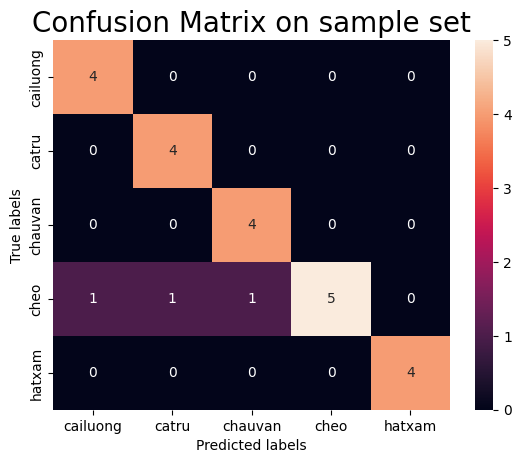

In [54]:
get_cfm(prod_pred, sample_test_label, class_list, "sample")

In [ ]:
chauvan_test = ["/content/drive/MyDrive/DATA/test_audio/CoChin-ThanhNgoanKhacTu-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/CauBeDoiNgang-VanChuong-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/ThinhMauVaQuanDeNhat-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/BaChuaThac-ChauVan-ThanhNgoan-CHAUVAN.mp3",
                "/content/drive/MyDrive/DATA/test_audio/CoSau-VanChuong-CHAUVAN.mp3"]

In [ ]:
prod_pred, prod_class = PROD_predict(chauvan_test, "/content/drive/MyDrive/DATA/test_images",
             best_model1, best_model2, best_model3)

In [ ]:
prod_pred, prod_class